<a href="https://colab.research.google.com/github/mahmoud25112/Advanced_data_science/blob/main/TikTok_code/TikTok_project_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TikTok Project**
**Course 6 - The Nuts and bolts of machine learning**

Recall that you are a data professional at TikTok. Your supervisor was impressed with the work you have done and has requested that you build a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

A notebook was structured and prepared to help you in this project. A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 6 End-of-course project: Classifying videos using machine learning**

In this activity, you will practice using machine learning techniques to predict on a binary outcome variable.
<br/>

**The purpose** of this model is to increase response time and system efficiency by automating the initial stages of the claims process.

**The goal** of this model is to predict whether a TikTok video presents a "claim" or presents an "opinion".
<br/>

*This activity has three parts:*

**Part 1:** Ethical considerations
* Consider the ethical implications of the request

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them, and advise on next steps

Follow the instructions and answer the questions below to complete the activity. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.



# **Classify videos using machine learning**


# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.



## **PACE: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following questions:


1.   **What are you being asked to do? What metric should I use to evaluate success of my business/organizational objective?**

2.   **What are the ethical implications of the model? What are the consequences of your model making errors?**
  *   What is the likely effect of the model when it predicts a false negative (i.e., when the model says a video does not contain a claim and it actually does)?

  *   What is the likely effect of the model when it predicts a false positive (i.e., when the model says a video does contain a claim and it actually does not)?

3.   **How would you proceed?**


==> ENTER YOUR RESPONSES HERE

### **Task 1. Imports and data loading**

Start by importing packages needed to build machine learning models to achieve the goal of this project.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import packages for data manipulation
import pandas as pd
import numpy as np


# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
# For saving models
import pickle



Now load the data from the provided csv file into a dataframe.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# Load dataset into dataframe
data = pd.read_csv("/content/drive/MyDrive/KaggleDatasets/tiktok_dataset.csv")


## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

### **Task 2: Examine data, summary info, and descriptive stats**

Inspect the first five rows of the dataframe.

In [4]:
# Display first few rows
### YOUR CODE HERE ###
data.head(10)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.0,62303.0,4293.0,1857.0
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,486192.0,193911.0,8616.0,5446.0
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.0,50.0,22.0,11.0
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.0,1050.0,53.0,27.0
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.0,171051.0,67739.0,4104.0,2540.0


Get the number of rows and columns in the dataset.

In [5]:
# Get number of rows and columns
data.shape

(19382, 12)

Get the data types of the columns.

In [6]:
# Get data types of columns
data.dtypes

,0
#,int64
claim_status,object
video_id,int64
video_duration_sec,int64
video_transcription_text,object
verified_status,object
author_ban_status,object
video_view_count,float64
video_like_count,float64
video_share_count,float64


Get basic information about the dataset.

In [7]:
# Get basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [8]:
# Generate basic descriptive stats
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Check for and handle missing values.

In [9]:
# Check for missing values
data.isna().sum()

,0
#,0
claim_status,298
video_id,0
video_duration_sec,0
video_transcription_text,298
verified_status,0
author_ban_status,0
video_view_count,298
video_like_count,298
video_share_count,298


In [10]:
# Drop rows with missing values
data_clean = data.dropna()

In [11]:

# Display first few rows after handling missing values
data_clean.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Check for and handle duplicates.

In [12]:
# Check for duplicates
print(data_clean.duplicated().sum())
data.info()

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Check for and handle outliers.

In [13]:
'''
#since we're using a tree based model we don't need to check for outliers,but
here is a sample code if we were to try a different model or approach
df = data_clean
columns = ['video_view_count','video_like_count','video_share_count','video_download_count',
           'video_comment_count','video_duration_sec']

for column in columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3 - q1
    upper = q3 + 1.5 * IQR
    lower = q1 - 1.5 * IQR
    print(column, "column had",df[ (df[column] >= upper) | (df[column] <= lower) ].shape[0],"outliers" )
    df = df[ (df[column] <= upper) & (df[column] >= lower) ] '''

'\n#since we\'re using a tree based model we don\'t need to check for outliers,but\nhere is a sample code if we were to try a different model or approach\ndf = data_clean\ncolumns = [\'video_view_count\',\'video_like_count\',\'video_share_count\',\'video_download_count\',\n           \'video_comment_count\',\'video_duration_sec\']\n\nfor column in columns:\n    q1 = df[column].quantile(0.25)\n    q3 = df[column].quantile(0.75)\n    IQR = q3 - q1 \n    upper = q3 + 1.5 * IQR\n    lower = q1 - 1.5 * IQR\n    print(column, "column had",df[ (df[column] >= upper) | (df[column] <= lower) ].shape[0],"outliers" )\n    df = df[ (df[column] <= upper) & (df[column] >= lower) ] '

Check class balance.

In [14]:
# Check class balance
### YOUR CODE HERE ###
df = data_clean
df['claim_status'].value_counts()

,count
claim_status,
claim,9608
opinion,9476



## **PACE: Construct**
Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3: Feature engineering**

Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [15]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
### YOUR CODE HERE ###
df['video_transcription_len'] = df['video_transcription_text'].apply(len)
df.head()

<ipython-input-15-e79cef1f9095>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['video_transcription_len'] = df['video_transcription_text'].apply(len)


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,video_transcription_len
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


Calculate the average text_length for claims and opinions.

In [16]:
# Calculate the average text_length for claims and opinions
### YOUR CODE HERE ###
df.groupby('claim_status')['video_transcription_len'].mean()


,video_transcription_len
claim_status,
claim,95.376978
opinion,82.722562


Visualize the distribution of `text_length` for claims and opinions.

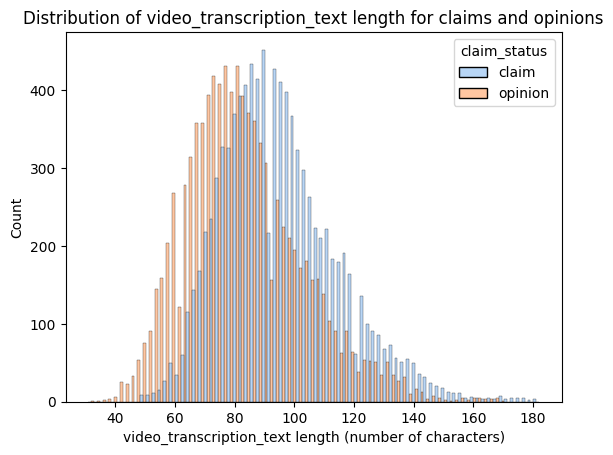

In [17]:
# Visualize the distribution of `text_length` for claims and opinions
# Create two histograms in one plot

sns.histplot(data=df, stat="count", multiple="dodge", x="video_transcription_len",
             kde=False, palette="pastel", hue="claim_status",
             element="bars", legend=True)
plt.xlabel("video_transcription_text length (number of characters)")
plt.ylabel("Count")
plt.title("Distribution of video_transcription_text length for claims and opinions")
plt.show()

**Feature selection and transformation**

Encode target and catgorical variables.

In [18]:
# Create a copy of the X data
### YOUR CODE HERE ###
X = df.copy()
# Drop unnecessary columns

X = X.drop(['#',"video_id"], axis=1)
# Encode target variable
X['claim_status'] = X['claim_status'].replace({'opinion':0, 'claim':1})
# Dummy encode remaining categorical values
### YOUR CODE HERE ###
X = pd.get_dummies(X,columns=['verified_status','author_ban_status'], drop_first=True)
X.head()

<ipython-input-18-0fb8e0c68185>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['claim_status'] = X['claim_status'].replace({'opinion':0, 'claim':1})


,claim_status,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,video_transcription_len,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,1,59,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True
1,1,32,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False
2,1,31,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False
3,1,25,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,False
4,1,19,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,False


### **Task 4: Split the data**

Assign target variable.

In [19]:
# Isolate target variable
### YOUR CODE HERE ###
y = X['claim_status']

Isolate the features.

In [20]:
# Isolate features
X = X.drop(['claim_status'],axis=1)
vectorizer = CountVectorizer(ngram_range=(2, 3),
                            max_features=15,
                            stop_words='english')

X_transcripts = vectorizer.fit_transform(X['video_transcription_text']).toarray()
X_transcripts_df = pd.DataFrame(X_transcripts, columns=vectorizer.get_feature_names_out())

X_other_features = X.drop(columns=['video_transcription_text'])
X_combined = pd.concat([X_other_features.reset_index(drop=True), X_transcripts_df], axis=1)

# Display first few rows of features dataframe
X_combined.head()
X_combined

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,video_transcription_len,verified_status_verified,author_ban_status_banned,author_ban_status_under review,...,friend read,internet forum,learned media,learned news,media claim,news claim,point view,read media,social media,willing wager
0,59,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True,...,0,0,0,0,0,0,0,0,0,0
1,32,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False,...,0,0,0,0,0,0,0,0,0,0
2,31,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3,25,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,19,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,False,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19079,49,6067.0,423.0,81.0,8.0,2.0,65,False,False,False,...,0,0,0,0,0,0,0,0,0,0
19080,23,2973.0,820.0,70.0,3.0,0.0,66,False,False,False,...,0,0,0,0,0,0,0,0,0,0
19081,50,734.0,102.0,7.0,2.0,1.0,53,False,False,False,...,0,0,0,0,0,0,0,0,0,0
19082,8,3394.0,655.0,123.0,11.0,4.0,80,False,False,False,...,0,0,0,0,0,0,0,0,0,0


#### **Task 5: Create train/validate/test sets**

Split data into training and testing sets, 80/20.

In [21]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_combined,y, test_size=0.2, random_state=42)

Split the training set into training and validation sets, 75/25, to result in a final ratio of 60/20/20 for train/validate/test sets.

In [22]:
# Split the training data into training and validation sets
x_train, xval_test, y_train, yval_test = train_test_split(x_train, y_train, test_size= 0.25, random_state=42)

Confirm that the dimensions of the training, validation, and testing sets are in alignment.

In [23]:
# Get shape of each training, validation, and testing set
### YOUR CODE HERE ###
x_train.shape, x_test.shape,  xval_test.shape,y_train.shape, y_test.shape, yval_test.shape,

((11450, 25), (3817, 25), (3817, 25), (11450,), (3817,), (3817,))

### **Task 6. Build models**


### **Build a random forest model**

Fit a random forest model to the training set. Use cross-validation to tune the hyperparameters and select the model that performs best on recall.

In [26]:
# Instantiate the random forest classifier
### YOUR CODE HERE ###
rf = RandomForestClassifier(random_state=0)
# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [2, None],
             'min_samples_leaf': [1,2],
             'min_samples_split': [2,3],
            'max_samples': [0.7],
             'max_features': [0.6,2],
             'n_estimators': [75,200]
             }


# Define a dictionary of scoring metrics to capture
scoring=['accuracy','precision','recall','f1']




In [27]:
# Examine best recall score
### YOUR CODE HERE ###
rf_cv = GridSearchCV(estimator=rf, param_grid=cv_params, scoring=scoring, cv=5 , refit='recall')
rf_cv.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [2, None], 'max_features': [0.6, 2],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [75, 200]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [28]:
  # Get all the results from the CV and put them in a df
print(rf_cv.best_score_)

# Isolate the row of the df with the max(mean precision score)
cv_results = rf_cv.cv_results_
cv_results_df = pd.DataFrame(cv_results)
print(cv_results_df.head())



best_precision_row = cv_results_df.loc[cv_results_df['mean_test_precision'].idxmax()]
print("Row with the highest mean precision score:")
print(best_precision_row)


0.9956886138466574
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.860895      0.572357         0.030239        0.026140   
1       0.938606      0.012204         0.022184        0.001629   
2       0.357064      0.002279         0.016071        0.002035   
3       1.217496      0.231417         0.032992        0.010438   
4       0.357665      0.007990         0.015564        0.002996   

  param_max_depth  param_max_features  param_max_samples  \
0               2                 0.6                0.7   
1               2                 0.6                0.7   
2               2                 0.6                0.7   
3               2                 0.6                0.7   
4               2                 0.6                0.7   

   param_min_samples_leaf  param_min_samples_split  param_n_estimators  ...  \
0                       1                        2                  75  ...   
1                       1                        2         

In [29]:
# Examine best parameters
### YOUR CODE HERE ###
print(rf_cv.best_params_)


{'max_depth': None, 'max_features': 2, 'max_samples': 0.7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


**Question:** How well is your model performing? Consider average recall score and precision score.

### **Build an XGBoost model**

In [31]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)
# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [4,12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300]
             }
# Define a dictionary of scoring metrics to capture

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(estimator=xgb, param_grid=cv_params, scoring=['f1', 'accuracy', 'recall', 'precision'], cv=5 , refit='recall')

xgb_cv.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [4, 12],
                         'min_child_weight': [3, 5], 'n_estimators': [300]},
             refit='recall', scoring=['f1', 'accuracy', 'recall', 'precision'])

In [32]:
  # Get all the results from the CV and put them in a df
print(xgb_cv.best_score_)

# Isolate the row of the df with the max(mean precision score)
cv_results = xgb_cv.cv_results_
cv_results_df = pd.DataFrame(cv_results)
print(cv_results_df.head())


best_precision_row = cv_results_df.loc[cv_results_df['mean_test_precision'].idxmax()]
print("Row with the highest mean precision score:")
print(best_precision_row)

  # Isolate the row of the df with the max(mean precision score)


0.9898247597512719
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.310715      0.035536         0.025262        0.004925   
1       1.287704      0.881623         0.041476        0.022114   
2       0.338455      0.015005         0.027268        0.003704   
3       0.322883      0.014768         0.024344        0.000577   
4       0.291489      0.008304         0.026263        0.000996   

   param_learning_rate  param_max_depth  param_min_child_weight  \
0                 0.01                4                       3   
1                 0.01                4                       5   
2                 0.01               12                       3   
3                 0.01               12                       5   
4                 0.10                4                       3   

   param_n_estimators                                             params  \
0                 300  {'learning_rate': 0.01, 'max_depth': 4, 'min_c...   
1                 300  

**Question:** How well does your model perform? Consider recall score and precision score.


## **PACE: Execute**
Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 7. Evaluate model**

Evaluate models against validation criteria.

#### **Random forest**

In [33]:
# Use the random forest "best estimator" model to get predictions on the encoded testing set
### YOUR CODE HERE ###
y_pred = rf_cv.best_estimator_.predict(xval_test)

Display the predictions on the encoded testing set.

In [35]:
# Display the predictions on the encoded testing set
print('accuracy',accuracy_score(yval_test,y_pred))
print('precision',precision_score(yval_test,y_pred))
print('f1',f1_score(yval_test,y_pred))
print('recall',recall_score(yval_test,y_pred))


accuracy 0.9976421273251245
precision 1.0
f1 0.9976031957390147
recall 0.9952178533475027


Display the true labels of the testing set.

In [36]:
# Display the true labels of the testing set
yval_test

,claim_status
1871,1
16574,0
17741,0
17214,0
17821,0
...,...
15929,0
12177,0
18295,0
17339,0


Create a confusion matrix to visualize the results of the classification model.

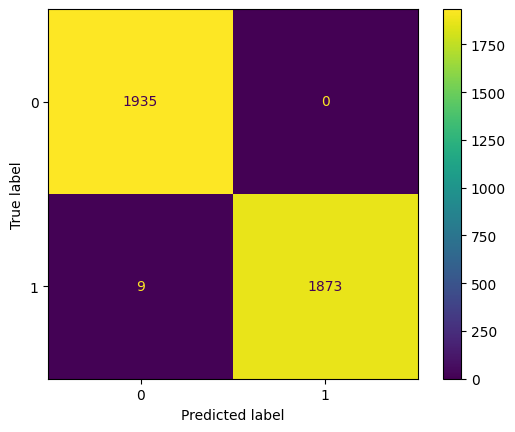

In [37]:
# Create a confusion matrix to visualize the results of the classification model
cm = confusion_matrix(yval_test, y_pred)
log_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=None)

# Compute values for confusion matrix

# Create display of confusion matrix
log_disp.plot()

# Plot confusion matrix
plt.show()
# Display plot


Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the model.

In [38]:
# Create a classification report
# Create classification report for random forest model
target_labels = ['opinion', 'claim']
print(classification_report(yval_test,y_pred, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       1.00      1.00      1.00      1935
       claim       1.00      1.00      1.00      1882

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



**Question:** What does your classification report show? What does the confusion matrix indicate?

#### **XGBoost**

In [39]:
#Evaluate XGBoost model
y_pred = xgb_cv.best_estimator_.predict(xval_test)

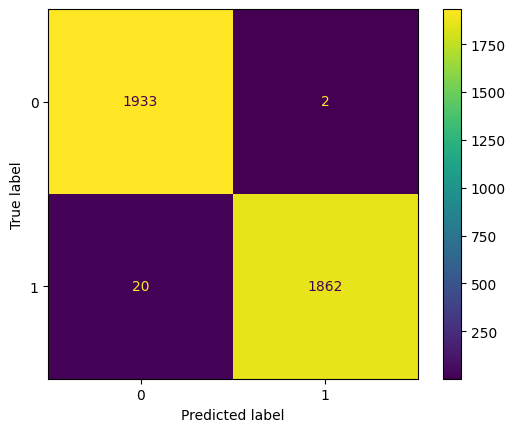

In [40]:
# Compute values for confusion matrix
cm = confusion_matrix(yval_test, y_pred)
log_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=None)

# Compute values for confusion matrix

# Create display of confusion matrix
log_disp.plot()

# Plot confusion matrix
plt.show()
# Display plot


In [41]:
# Create a classification report
target_labels = ['opinion', 'claim']
print(classification_report(yval_test,y_pred, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      0.99      1935
       claim       1.00      0.99      0.99      1882

    accuracy                           0.99      3817
   macro avg       0.99      0.99      0.99      3817
weighted avg       0.99      0.99      0.99      3817



**Question:** Describe your XGBoost model results. How does your XGBoost model compare to your random forest model?

### **Use champion model to predict on test data**

In [43]:
### YOUR CODE HERE ###
y_pred = rf_cv.best_estimator_.predict(x_test)

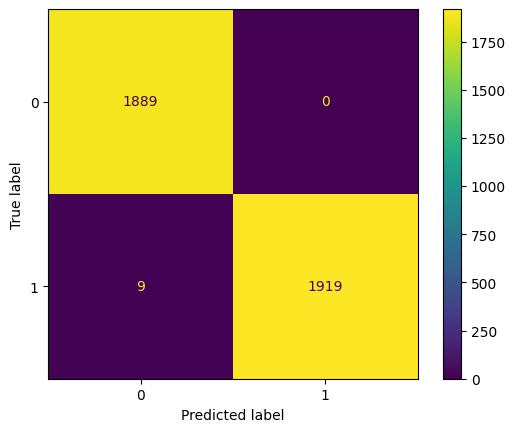

In [44]:
cm = confusion_matrix(y_test, y_pred)
log_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=None)

# Compute values for confusion matrix

# Create display of confusion matrix
log_disp.plot()

# Plot confusion matrix
plt.show()


#### **Feature importances of champion model**


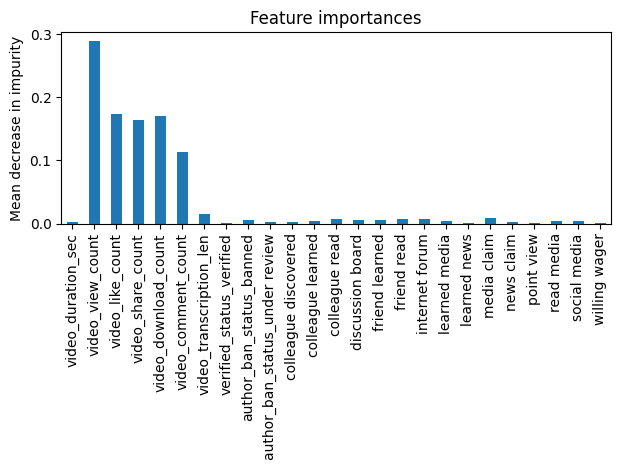

In [46]:
### YOUR CODE HERE ###
importances = rf_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_combined.columns)

fig, ax = plt.subplots()
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()

**Question:** Describe your most predictive features. Were your results surprising?

### **Task 8. Conclusion**

In this step use the results of the models above to formulate a conclusion. Consider the following questions:

1. **Would you recommend using this model? Why or why not?**

2. **What was your model doing? Can you explain how it was making predictions?**

3. **Are there new features that you can engineer that might improve model performance?**

4. **What features would you want to have that would likely improve the performance of your model?**

Remember, sometimes your data simply will not be predictive of your chosen target. This is common. Machine learning is a powerful tool, but it is not magic. If your data does not contain predictive signal, even the most complex algorithm will not be able to deliver consistent and accurate predictions. Do not be afraid to draw this conclusion.



I would strongly recommend using the model, it performed really well on the test dataset in the end. My model was training using different decsision trees in parallel , and it was using different susbset of features so it doesn't overfi. I can try to engineer related features like video view count and video share count and make a new feature called video engagment .
